In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

already in numpy array forms.

since the image processing already done in this data so we directly comes nural network part.

In [4]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data= 60,000 images
test data= 10,000 images
image dimension= 28*28
grayscale image = 1 channel

In [5]:
# printing the 10 images
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


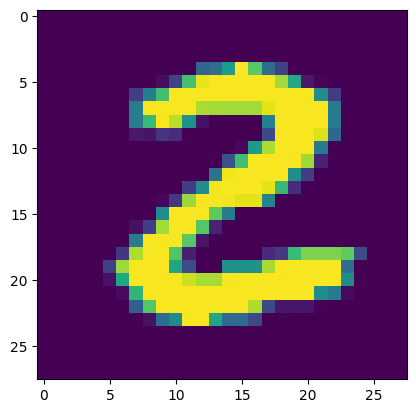

2


In [7]:
#displaying the image
plt.imshow(X_train[25])
plt.show()

#printing the corresponding label
print(y_train[25])

image labels

In [8]:
print(y_train.shape,y_test.shape) #labels like [0,1,2,3....,9]

(60000,) (10000,)


Y contain the digit labels (0 to 9)

In [9]:
 print(np.unique(y_train))
 print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
 # scaling the value for better accuracy (range 0 to 1)
 X_train=X_train/255
 X_test=X_test/255

building the neural network

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compiling the model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8524 - loss: 0.5087
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9530 - loss: 0.1536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.1098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0859
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9784 - loss: 0.0698
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0591
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9843 - loss: 0.0508
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0430
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9883 - loss: 0.0385
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0342


training data accuracy = 98.9%

evaluation:

In [14]:
loss, accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1459
0.9700000286102295


test data  accuraccy= 97.1%

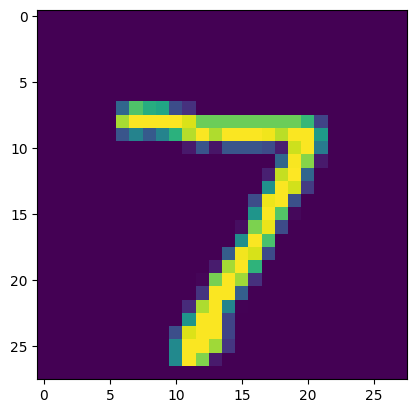

In [15]:
# printing the first image of x test
plt.imshow(X_test[0])
plt.show()

In [17]:
#now printing there label
print(y_test[0])

7


In [20]:
y_pred=model.predict(X_test)
y_pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(10000, 10)

In [21]:
print(y_pred[0]) # ans in a probabilty form

[3.7480713e-05 8.0072874e-05 9.5459938e-01 9.6606648e-01 1.9915444e-07
 1.9157720e-01 1.5299222e-11 9.9999934e-01 6.9905508e-01 9.8462421e-01]


converting the prediction probabilities to class label

In [22]:
label_first_test_image=np.argmax(y_pred[0])
print(label_first_test_image)

7


In [24]:
 #for all test data
 y_pred_labels=[np.argmax(i) for i in y_pred]
 print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(8), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [25]:
cof_mat= confusion_matrix(y_test,y_pred_labels)
print(cof_mat)

tf.Tensor(
[[ 952    0    2    3    0    1   13    0    2    7]
 [   0 1120    2    1    0    1    6    1    3    1]
 [   2    0 1002    7    2    0    7    3    8    1]
 [   0    0    3  987    0    5    0    5    6    4]
 [   0    0   10    0  944    1    9    4    3   11]
 [   2    0    0   16    2  852    6    0   12    2]
 [   2    2    4    0    1    7  942    0    0    0]
 [   0    4    8    4    0    0    1  996    2   13]
 [   2    0    5    4    2    4    6    2  946    3]
 [   0    1    0    6   13    5    3    3   18  960]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

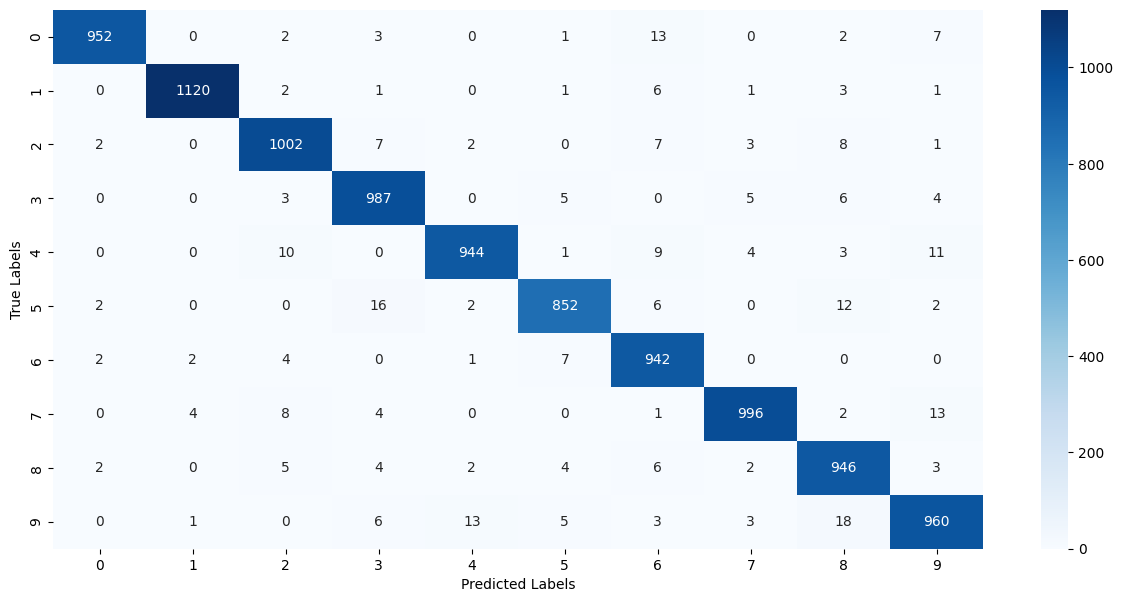

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(cof_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

images is 0 in first row and model pred 952 0 image are predict right and 2time  0 predict as 2.....

path of the image:/content/3.png


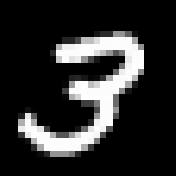

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
3


In [41]:
input_path= input('path of the image:')

input_image=cv2.imread(input_path)# converting in the form of array
cv2_imshow(input_image)

#input_image.shape # cosidering as a rgb image we convert in to gray scale image

# converting in to gray scale
gray=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
#gray.shape

# now converting in to 28 by 28 pixel
input_image_resize=cv2.resize(gray,(28,28))
#input_image_resize.shape

#cv2_imshow(input_image_resize)

# now scaling the input image
input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])# tell  the model we are predicting for one image

input_prediction =model.predict(image_reshaped)
#print(input_prediction)

#now for the label
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)